# Question 1

## Q1.1 generate data:
(a) $X$ uniform samples between -1 and 1, $X = -1, -0.99, \ldots, 0.99, 1$
 
(b) $Y = 2\cdot X$
 
(c) $n_1$ samples from a normal random variable with mean 0 and variance 0.01
 
$\hspace{5cm} X' = X + n_1$

(d) $n_2$ samples from a normal random variable with mean 0 and variance 0.01
 
$\hspace{5cm} Y' = y + n_2$


## Q1.2
Are $X'$ and $Y'$ statistically dependent? what type of dependence? how can you show that? 

show it

# Question 2


Load the data in movie_rating.csv into a dataframe. The data consists of critic ratings and people votes for a set of 20 movies.
## Q2.1
Compute the linear correlation between critic ratings and people votes

## Q2.2
(a) To explore the connection between critic ratings and people votes, draw them against each other in a scatter plot.

(b) Create a new data frame, with all the movies, except the one with the lowest people vote. Compute the linear correlation.

(c) Draw a scatter plot for the movies selected. Is there a linear connection? 

(d) Congragulations you've encountered an outlier, a data point so far from the others, keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to complexity (hunderds of variables), size (thousands of movies), etc. In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

Create a new data frame for all movies with all critic ratings replaced by their rank and the same for people vote. Draw a scatter plot, and compute the linear correlation.

Correlation over ranks is named Spearman correlation.

# Question 3
Read the csv file bank-full.csv into a data frame. The description
of this data can be found in bank-info.txt

(a) Compute the Spearman correlation between days from last contact and previous campaign contacts

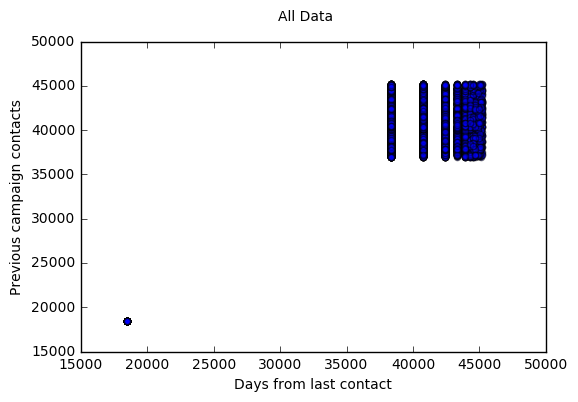

                            days_from_last_contact  previous_campaign_contacts
days_from_last_contact                    1.000000                    0.985645
previous_campaign_contacts                0.985645                    1.000000


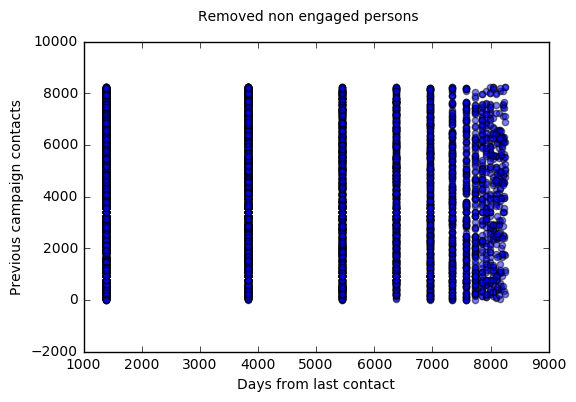

                            days_from_last_contact  previous_campaign_contacts
days_from_last_contact                    1.000000                   -0.101273
previous_campaign_contacts               -0.101273                    1.000000


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create two groups, one with all the original data 
# and another one only with rows that has at least 1 previous_campaign_contacts
bank_data = pd.read_csv('bank-full.csv', usecols=['days_from_last_contact','previous_campaign_contacts'])
bank_data_with_contacts=  bank_data[bank_data['previous_campaign_contacts'] > 0]
rank_bank_data = bank_data.rank()
rank_bank_with_contacts_data = bank_data_with_contacts.rank()

previous_campaign_contacts_array = np.array(rank_bank_data['previous_campaign_contacts'])
days_from_last_contact_array = np.array(rank_bank_data['days_from_last_contact'])
plt.scatter(previous_campaign_contacts_array, days_from_last_contact_array, s=20, alpha=0.5)
plt.suptitle('All Data')
plt.xlabel('Days from last contact')
plt.ylabel('Previous campaign contacts')
plt.show()
print rank_bank_data.corr()

previous_campaign_contacts_array = np.array(rank_bank_with_contacts_data['previous_campaign_contacts'])
days_from_last_contact_array = np.array(rank_bank_with_contacts_data['days_from_last_contact'])
plt.scatter(previous_campaign_contacts_array, days_from_last_contact_array, s=20, alpha=0.5)
plt.suptitle('Removed non engaged persons')
plt.xlabel('Days from last contact')
plt.ylabel('Previous campaign contacts')
plt.show()
print rank_bank_with_contacts_data.corr()


(b) Is there an actual linear correlation between the ranks? 
Explain the reason for the high correlation between the two (use plots if necessary)

The high correlation between the variables is explained by a lot of rows which represents people that has never been in contact with the campaign and have 0 days from last contact as consequence. When we get rid of all these cases and remain only with the rows that has at least one contact from previous campaigns, we see that the correlation descreases dramatically to -0.101273, indicating that there are no linear correlation between the two variables.